In [55]:
!pip install pandas

import pandas as pd


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [56]:
dump = pd.read_csv('drugsComTest_raw.csv') 

dump

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4
...,...,...,...,...,...,...,...
53761,159999,Tamoxifen,"Breast Cancer, Prevention","""I have taken Tamoxifen for 5 years. Side effe...",10,13-Sep-14,43
53762,140714,Escitalopram,Anxiety,"""I&#039;ve been taking Lexapro (escitaploprgra...",9,8-Oct-16,11
53763,130945,Levonorgestrel,Birth Control,"""I&#039;m married, 34 years old and I have no ...",8,15-Nov-10,7
53764,47656,Tapentadol,Pain,"""I was prescribed Nucynta for severe neck/shou...",1,28-Nov-11,20


In [57]:
dump2=dump.loc[dump["drugName"]=="Mirtazapine"]
dump2

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
366,210901,Mirtazapine,Depression,"""I was prescribed this med during a stay in th...",10,2-Feb-16,44
742,210631,Mirtazapine,Depression,"""Having been prescribed citalopram, sertraline...",7,25-May-17,16
1286,163821,Mirtazapine,Insomnia,"""Really good for sleep. I don&#039;t like it ...",9,2-Sep-09,48
1477,210614,Mirtazapine,Insomnia,"""Taking 30mg daily now for insomnia. Best med...",10,31-Jul-17,16
...,...,...,...,...,...,...,...
50466,210708,Mirtazapine,Insomnia,"""This med is great! Suffered from anxiety thre...",10,28-Mar-17,37
50726,210712,Mirtazapine,Depression,"""I have recently started Mirtazepine and read ...",10,19-Mar-17,30
51440,210689,Mirtazapine,Insomnia,"""I suffered a neurotoxic reaction to another d...",10,1-Dec-16,31
52932,163865,Mirtazapine,Depression,"""I&#039;ve been on Mirtazapine for 10 months. ...",8,23-Jul-10,23


In [58]:
dataset = dump2[['review','rating']]
dataset.columns = ['Review', 'Sentiment']

dataset

,Review,Sentiment
0,"""I&#039;ve tried a few antidepressants over th...",10
366,"""I was prescribed this med during a stay in th...",10
742,"""Having been prescribed citalopram, sertraline...",7
1286,"""Really good for sleep. I don&#039;t like it ...",9
1477,"""Taking 30mg daily now for insomnia. Best med...",10
...,...,...
50466,"""This med is great! Suffered from anxiety thre...",10
50726,"""I have recently started Mirtazepine and read ...",10
51440,"""I suffered a neurotoxic reaction to another d...",10
52932,"""I&#039;ve been on Mirtazapine for 10 months. ...",8


In [59]:
print(dataset["Sentiment"].min())
print(dataset["Sentiment"].max())

1
10


In [60]:
# Creating a new column sentiment based on overall ratings
def compute_sentiments(labels):
    sentiments = []
    for label in labels:
        if label > 7.0:
            sentiment = "good"
        elif label > 4.0:
            sentiment = "bad"
        else:
            sentiment = "ugly"
        sentiments.append(sentiment)
    return sentiments

In [61]:
# Creating a new column sentiment based on overall ratings
def compute_sentiments2(labels):
    sentiments = []
    for label in labels:
        if label > 5.0:
            sentiment = "good"
        elif label <= 5.0:
            sentiment = "bad"
        sentiments.append(sentiment)
    return sentiments

In [62]:
dataset['Sentiment'] = compute_sentiments2(dataset.Sentiment)
#dataset.loc[:, 'Sentiment'] = compute_sentiments(dataset.Sentiment)

<ipython-input-62-3ffb81e2e0a9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Sentiment'] = compute_sentiments2(dataset.Sentiment)


In [63]:
dataset
#data is converted to 0-1 from scale of 0-5

,Review,Sentiment
0,"""I&#039;ve tried a few antidepressants over th...",good
366,"""I was prescribed this med during a stay in th...",good
742,"""Having been prescribed citalopram, sertraline...",good
1286,"""Really good for sleep. I don&#039;t like it ...",good
1477,"""Taking 30mg daily now for insomnia. Best med...",good
...,...,...
50466,"""This med is great! Suffered from anxiety thre...",good
50726,"""I have recently started Mirtazepine and read ...",good
51440,"""I suffered a neurotoxic reaction to another d...",good
52932,"""I&#039;ve been on Mirtazapine for 10 months. ...",good


In [64]:
dataset['Sentiment'].value_counts()

good 136
bad 45
Name: Sentiment, dtype: int64

In [65]:
# check for null values
dataset.isnull().sum()

# no null values in the data

Review 0
Sentiment 0
dtype: int64

In [66]:
### Data Transformation

In [67]:
x = dataset['Review']
y = dataset['Sentiment']
print(x)
print(y)

0        "I&#039;ve tried a few antidepressants over th...
366      "I was prescribed this med during a stay in th...
742      "Having been prescribed citalopram, sertraline...
1286     "Really good for sleep.  I don&#039;t like it ...
1477     "Taking 30mg daily now for insomnia.  Best med...
                               ...                        
50466    "This med is great! Suffered from anxiety thre...
50726    "I have recently started Mirtazepine and read ...
51440    "I suffered a neurotoxic reaction to another d...
52932    "I&#039;ve been on Mirtazapine for 10 months. ...
53221    "I recently started Remeron after trying Buspa...
Name: Review, Length: 181, dtype: object
0        good
366      good
742      good
1286     good
1477     good
         ... 
50466    good
50726    good
51440    good
52932    good
53221    good
Name: Sentiment, Length: 181, dtype: object


In [68]:
#lets make a tokenizer for preprocessing with spacy
!pip install spacy
!python3 -m spacy download en_core_web_sm


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 18.4 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [69]:
#the text_data cleaning function will be our preprocessing function for lemmatizing 
import spacy
nlp = spacy.load('en_core_web_sm')
import string
punct = string.punctuation

from spacy.lang.en.stop_words import STOP_WORDS
stopwords = list(STOP_WORDS)
def text_data_cleaning(sentence):
    doc = nlp(sentence)                         # spaCy tokenize text 

    tokens = [] # list of tokens
    for token in doc:
        if token.lemma_ != "-PRON-":
            temp = token.lemma_.lower().strip()
        else:
            temp = token.lower_
        tokens.append(temp)

    cleaned_tokens = []
    for token in tokens:
        if token not in stopwords and token not in punct:
            cleaned_tokens.append(token)
    return cleaned_tokens

In [70]:
# if root form of that word is not proper noun then it is going to convert that into lower form
# and if that word is a proper noun, then we are directly taking lower form,
# because there is no lemma for proper noun

# stopwords and punctuations removed

In [71]:
###Feature Engineering (TF-IDF)

In [72]:
!pip install sklearn


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [73]:
#lets talk about tfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [74]:
tfidf = TfidfVectorizer(tokenizer=text_data_cleaning)
# tokenizer=text_data_cleaning, tokenization will be done according to this function

In [75]:
###Train the model
###1.Train/ Test Split

In [76]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = dataset.Sentiment, random_state = 42)

In [77]:
x_train.shape, x_test.shape

((144,), (37,))

In [78]:
print(x_train)

19221    "I&#039;ve been on Effexor for several years a...
33054    "Eating all the time hope this goes when I can...
47717    "Only been taking Remeron for anxiety, for a w...
46123    "In reading through these reviews I really was...
25596    "I&#039;ve been on Remeron for a month now and...
                               ...                        
27507    "Ive been in recovery from opiods for 14 month...
34830    "I have been taking low dose mirtazapine (3.75...
31937    "Hated it. Was prescribed 30 mg. Slept 14 hrs ...
21095    "Great, SSRI&#039;s do next to nothing for me ...
9175     "I experienced insomnia due to the stress of r...
Name: Review, Length: 144, dtype: object


In [79]:
###2.Fit x_train and y_train

In [80]:
from sklearn.svm import LinearSVC
classifier = LinearSVC()

In [81]:
#or you can use LogisticRegression classifier
from sklearn.linear_model import LogisticRegression
classifier2 = LogisticRegression()

In [82]:
#or nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
classifier3=KNeighborsClassifier()

In [83]:
#https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html
#or DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
classifier4=DecisionTreeClassifier()

In [84]:
from sklearn.ensemble import RandomForestClassifier
classifier5=RandomForestClassifier()

In [85]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([('tfidf',tfidf), ('clf',classifier3)])
# it will first do vectorization and then it will do classification

In [86]:
pipeline.fit(x_train, y_train)

/opt/python/envs/default/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Pipeline(steps=[('tfidf',
 TfidfVectorizer(tokenizer=<function text_data_cleaning at 0x7fc92f117e50>)),
 ('clf', KNeighborsClassifier())]) In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org. Pipeline Pipeline(steps=[('tfidf',
 TfidfVectorizer(tokenizer=<function text_data_cleaning at 0x7fc92f117e50>)),
 ('clf', KNeighborsClassifier())]) TfidfVectorizer TfidfVectorizer(tokenizer=<function text_data_cleaning at 0x7fc92f117e50>) KNeighborsClassifier KNeighborsClassifier()

In [87]:
###Check Model Performance

In [88]:
y_pred = pipeline.predict(x_test)
print(y_pred)

['good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good'
 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good'
 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good'
 'good' 'good' 'good' 'good' 'good' 'good' 'good']


In [89]:
#lets see our results of analysis in metrics - predicted values and the accuracy of our model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [90]:
# confusion_matrix
cm=confusion_matrix(y_test, y_pred,labels=pipeline.classes_)
print(cm)
# we are getting almost 91% accuracy

[[ 0  9]
 [ 0 28]]


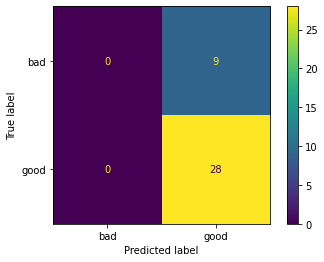

In [91]:
import matplotlib.pyplot as plt
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)
disp.plot()
plt.show()

In [92]:
# classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         bad       0.00      0.00      0.00         9
        good       0.76      1.00      0.86        28

    accuracy                           0.76        37
   macro avg       0.38      0.50      0.43        37
weighted avg       0.57      0.76      0.65        37



/opt/python/envs/default/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/python/envs/default/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/python/envs/default/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [93]:
round(accuracy_score(y_test, y_pred)*100,2)

75.68

In [94]:
###Predict Sentiments using Model
###1. simple way

In [95]:
prediction = pipeline.predict(["Was only sleeping 2-3 hours a night, some nights none at all. This on top of house, kids and a stressfull job, I was a walking mess. Started taking mirtazapine on my doctor&#039;s advice and it has changed my life completely. No stress and I sleep like a baby."])
prediction2 = pipeline.predict(["Instant side effects, all extreme. Lightheadedness,dry mouth; to the point it made not just my inner mouth dry, but my throat. Irritable isn&#039;t even the correct word. I was extremely angry, mad, and hostile for reason. That I can&#039;t even explain. My perception of depth was horrible. It took me 3 times just to pick something up off my counter. Every time I leaned to grab It, It seemed as if the object was further away.Definitely do NOT DRIVE!! I thought there was no way I would be able to have all of these side effects right away, and I was wrong. I went to the store to grab slushy for my children. When I came back outside to get into the Car; I realized that I Was directly parked over the dividing line for 2 parked vehicles. HATED this med"])


if prediction2 == 1:
  print("Result: This review is positive")
else:
  print("Result: This review is negative")

Result: This review is negative


In [96]:
print(prediction)

['good']


In [97]:
print(prediction2)

['bad']
